-------------------------------------<br>
(C) August 2017<br>
ANDY MAI - andymai.ca@aol.com<br>
San Jose, CA, USA - Capital of Silicon Valley<br>
Referred from various online sources<br>
-------------------------------------<br>
# MACHINE LEARNING - ALGORITHM SELECTION & CROSS VALIDATION
In this section, we will have an observation how to validate a model is effective or not

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

### We will get an example of K-NN classifier with digits dataset

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [4]:
y_pred = knn.predict(X)

In [5]:
print("{0} / {1} correct".format(np.sum(y == y_pred), len(y)))

1797 / 1797 correct


### LOOK AT THIS OUTPUT!!!
We can see that the model seems to be very fit the data, 100% accuracy. This is totally an incorrect way to evaludate a model. We test the data on the same set of data used for training, that why it returns a very great performance <br>==> <b><i>OVERFITTING MODEL </i></b>

## Using hold-out sets (splitting input data into train/test sets)
By doing this, we prevent our model from learning the noise. Then we can have better evaluation.<br>
<b>Note:</b> To validate the performance of a model, we may use cross_val_score (cross validation score) in SKLEARN metrics or we may use directly the score function in each model.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

445 / 450 correct


In [8]:
knn.score(X_test, y_test)

0.98888888888888893

The following step is to make our model more complex (by increasing its hyperparameters) to see if the more complex model gives the higher accuracy.

In [9]:
for n_neighbors in [1, 5, 10, 20, 30]:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    print(n_neighbors, knn.score(X_test, y_test))

1 0.988888888889
5 0.982222222222
10 0.982222222222
20 0.977777777778
30 0.971111111111


In [10]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=0)

In [11]:
print(KNeighborsClassifier(1).fit(X2, y2).score(X1, y1))
print(KNeighborsClassifier(1).fit(X1, y1).score(X2, y2))

0.983296213808
0.982202447164


In [12]:
from sklearn.cross_validation import cross_val_score
cv = cross_val_score(KNeighborsClassifier(1), X, y, cv=10)
cv.mean()

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.97614938602520218

<b> The above step is using 10-fold cross validation method to asset the model and returns the average cv_score</b>

## Create random number to observe Overfitting and Underfitting

In [13]:
def foo_func(x, err=0.5):
    y = 10 - 1./(x+0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

def make_data(N=40, error=1.0, random_seed=1):
    np.random.seed(1)
    X = np.random.random(N)[:,np.newaxis]
    y = foo_func(X.ravel(), error)
    
    return X, y

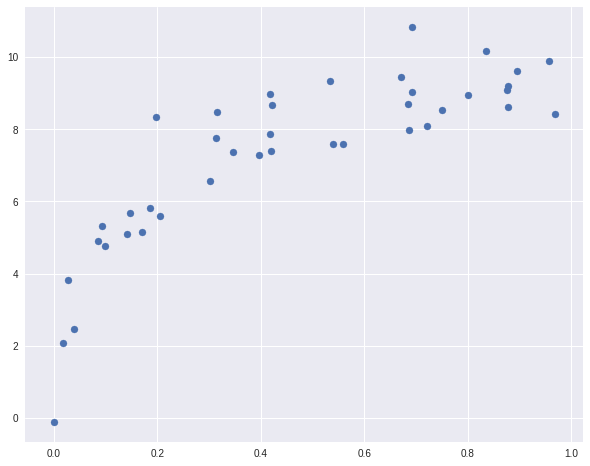

In [14]:
X, y = make_data(40, error=1)
plt.figure(figsize=(10,8))
plt.scatter(X.ravel(),y)

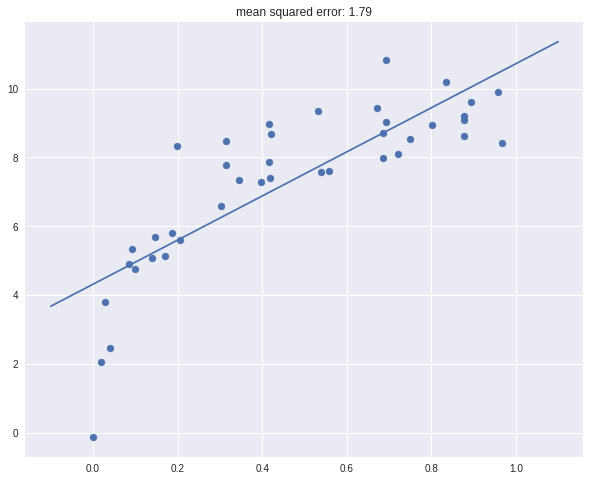

In [15]:
X_test = np.linspace(-0.1, 1.1, 500)[:,None]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X, y)
y_test = model.predict(X_test)
plt.figure(figsize=(10,8))
plt.scatter(X.ravel(),y)
plt.plot(X_test.ravel(),y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))

<b>From the scatter plot above, the model seems that cannot fit the majority of data. We use Linear Regression, it's a high bias model. In this example, our data is not linear, that's why this model is underfit.</b>

### We try to use a non-linear model to fit our data
In this example, I will use Polynomial Features which associates with Linear Regression to create a curve that hopefully will fit our data.<br>
We merge Polynomial Features and Linear Regression into new model called Polynomial Regression.

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

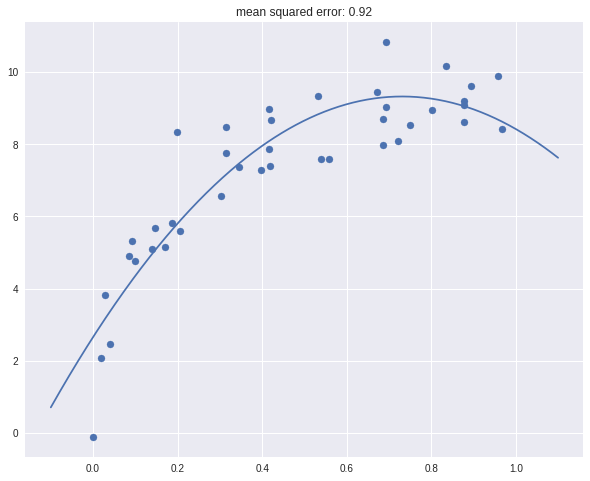

In [17]:
model = PolynomialRegression(2)
model.fit(X,y)
y_test = model.predict(X_test)
plt.figure(figsize=(10,8))
plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))

<b>We randomly choose the degree for our curve is 2 and the result seems very good for our model, the Mean Square Error is reduced.</b><br>
Let's try with higher degree to see if the outcome is better.

(-4, 14)

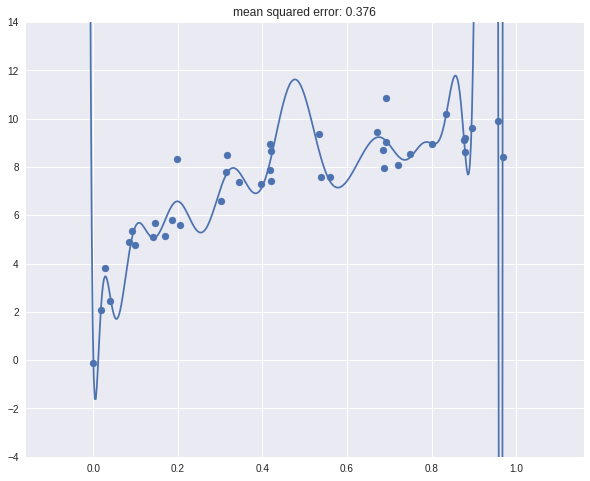

In [18]:
model = PolynomialRegression(30)
model.fit(X, y)
y_test = model.predict(X_test)
plt.figure(figsize=(10,8))
plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))
plt.ylim(-4, 14)

<b>Obviously, by increasing the degree, our model seems very fit the data and it tries to fit as much data as it can, including the noise.</b>
<br> ==> <b>OVERFITTING MODEL</b>

## VALIDATION CURVES and LEARNING CURVES
<b>When you face a situation that your estimator performs terrably, you may concern:</b><br>
* Use simpler or more complex model?
* Add more features to each observed data point?
* Add more training samples?
<br><br>
<b> << TRUE FACTS >> </b><br>
- Sometimes using a more complicated model will give worse results.
- Sometimes adding training data will not improve your results.
<br><br>
-----------------------------------------
<b>Validation Curves:</b> are plot of validation score and training score as a funcftion of <b>model complexity</b><br>
This plot is to help us in order to figure out which degree is good to apply to our model so that we can avoid either overfitting or underfitting. 

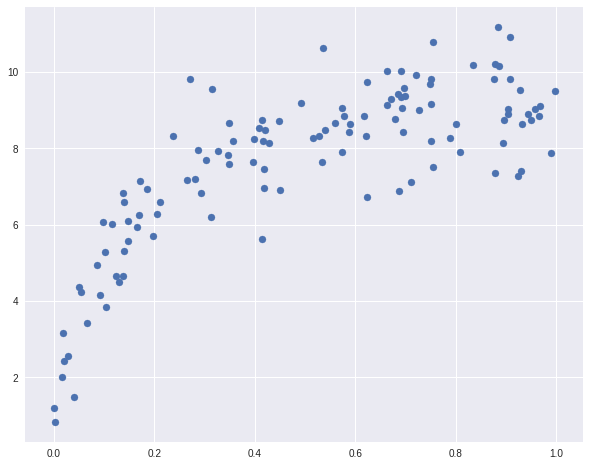

In [19]:
X, y = make_data(120, error=1.0)
plt.figure(figsize=(10,8))
plt.scatter(X, y);

In [20]:
from sklearn.learning_curve import validation_curve

def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred)**2))

degree = np.arange(0, 18)
val_train, val_test = validation_curve(PolynomialRegression(), X, y,
                                       'polynomialfeatures__degree', degree, cv=7,
                                       scoring=rms_error)

/usr/local/lib/python3.5/dist-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


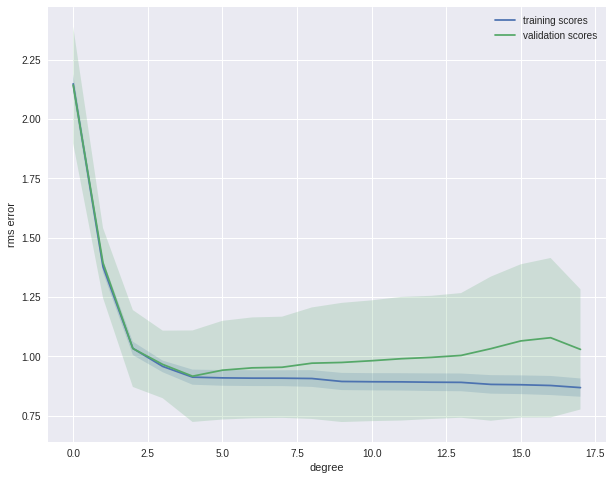

In [21]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1) # mean, std deviation
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
plt.figure(figsize=(10,8))
plot_with_err(degree, val_train, label='training scores')
plot_with_err(degree, val_test, label='validation scores')
plt.xlabel('degree'); plt.ylabel('rms error')
plt.legend()

<b> This above <i>Validation Curves</i> shows that when the degree is small, two curves are close to each other <br>==> causes UNDERFITTING.</b>(Because it does not have enough complexity to represent the data)<br>
<b>If two curves are far apart, the training score seems very good although the validation score does not <br>==> causes OVERFITTING.</b>(Because it has so much complexity, it will represent the noise instead of the real data)<br>
<i>===>>> From the plot, the best degree to choose to prevent both pitfalls mentioned above is 4</i>

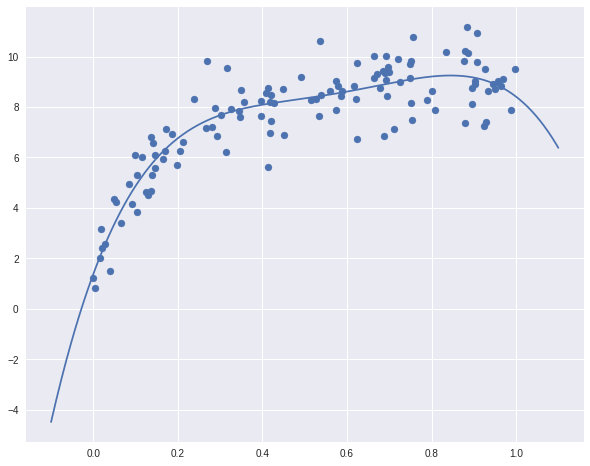

In [22]:
model = PolynomialRegression(4).fit(X,y)
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X_test, model.predict(X_test))

In [23]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(degree=3):
    train_sizes = np.linspace(0.05, 1, 20)
    N_train, val_train, val_test = learning_curve(PolynomialRegression(degree),
                                                  X, y, train_sizes, cv=5,
                                                  scoring=rms_error)
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('rms error')
    plt.ylim(0, 3)
    plt.xlim(5, 80)
    plt.legend()

* Learning curves: are a plot of validation score and learning score as a function of <b>number of training samples</b><br>

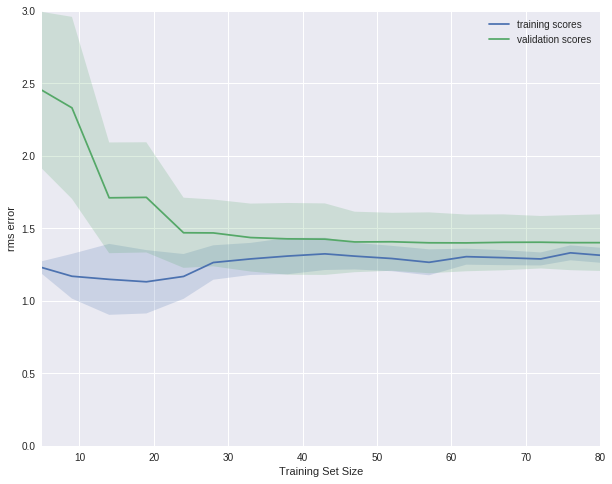

In [24]:
plt.figure(figsize=(10,8))
plot_learning_curve(1)

<b>When the curves are close (underfitting), adding more data WILL NOT basically enhance the estimator </b>

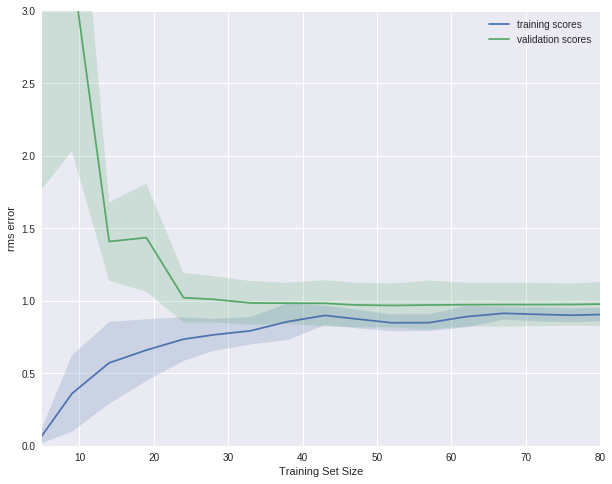

In [25]:
plt.figure(figsize=(10,8))
plot_learning_curve(3)

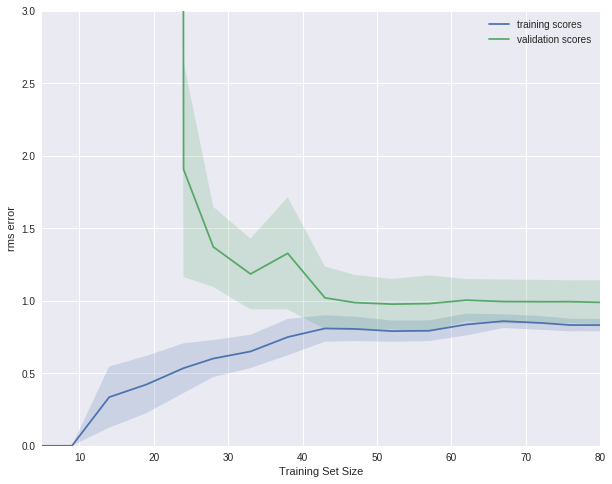

In [26]:
plt.figure(figsize=(10,8))
plot_learning_curve(10)

<b>When the curves are far apart (overfitting), adding more data MAY enhance the effectiveness of the model. </b>